In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [234]:
#importing the data
df=pd.read_csv(r"C:\Users\sauhard\Downloads\Churn.csv")

In [178]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.shape

(7043, 21)

In [24]:
#checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# EXPLORATORY DATA ANALYSIS


# Checking Missing values

In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values.

Now let us check blank values and replacing it with NaN

In [235]:
# replacing all the blank values with NaN 
df_new = df.replace(r'^\s*$', np.nan, regex=True)

# print missing values
print("Missing values (per feature): \n{}\n".format(df_new.isnull().sum()))

Missing values (per feature): 
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64



We can see 11 values in TotalCharges feature are missing. We will replace this with median of of TotalChrges column

In [236]:
median=df_new.TotalCharges.median()
df_new['TotalCharges'].fillna(median,inplace=True)

# Data type conversion

We have seen earlier, the datatype of TotalCharges column is object. So we will convert it to float64

In [237]:
df_new['TotalCharges']=df_new['TotalCharges'].apply(pd.to_numeric)

In [182]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

# Outlier Detection

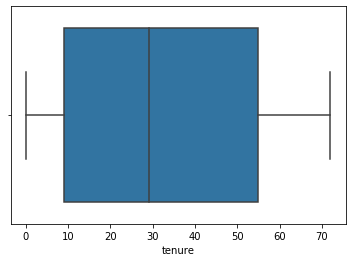

In [447]:
sns.boxplot(df['tenure'])

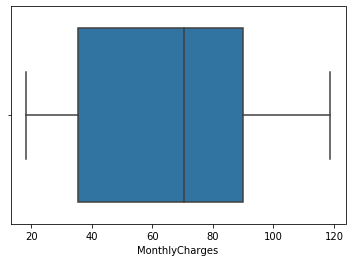

In [448]:
sns.boxplot(df['MonthlyCharges'])

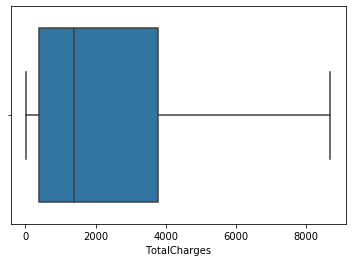

In [450]:
sns.boxplot(df_new['TotalCharges'])

We can observe here, With respect to TotalCharges, some of the values are extreme which can be considered as outliers.

# Let us analyse how personal informations like gender, partner, senior citizen,dependents are related to customer churn 

In [31]:
#Printing all labels
for col in df.columns:
    print(col,":",len(df[col].unique()),'labels')

customerID : 7043 labels
gender : 2 labels
SeniorCitizen : 2 labels
Partner : 2 labels
Dependents : 2 labels
tenure : 73 labels
PhoneService : 2 labels
MultipleLines : 3 labels
InternetService : 3 labels
OnlineSecurity : 3 labels
OnlineBackup : 3 labels
DeviceProtection : 3 labels
TechSupport : 3 labels
StreamingTV : 3 labels
StreamingMovies : 3 labels
Contract : 3 labels
PaperlessBilling : 2 labels
PaymentMethod : 4 labels
MonthlyCharges : 1585 labels
TotalCharges : 6531 labels
Churn : 2 labels


In [239]:
#CustomerId is not required for prediction
df_new= df_new.drop('customerID', axis=1)

In [33]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


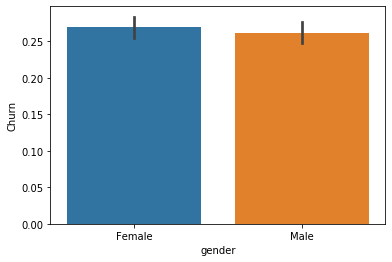

In [68]:
sns.barplot(x=df_new['gender'],y=df_new['Churn'],data=df_new)

We can see, here male and female both have approximately equal churn rate.

In [240]:
df_new.loc[df_new['SeniorCitizen'] == 0,'SeniorCitizen'] = 'No' 
df_new.loc[df_new['SeniorCitizen'] == 1,'SeniorCitizen'] = 'Yes'

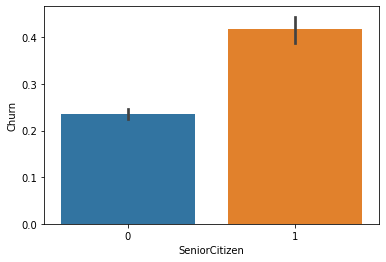

In [442]:
sns.barplot(y=df_new['Churn'],data=df_new,x=df_new['SeniorCitizen'])

Senior citizens are less likely to churn.

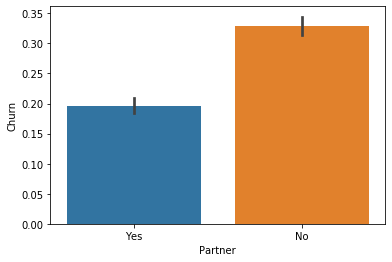

In [93]:
sns.barplot(x=df_new['Partner'],y=df_new['Churn'],data=df_new)

A customer having partner is less likely to churn.

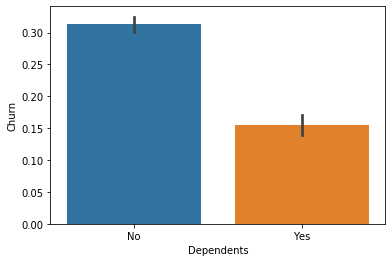

In [100]:
sns.barplot(x=df_new['Dependents'],y=df_new['Churn'],data=df_new)

A dependent customer is less likely to churn

# Overall conclusion

1.Customers without dependents are 4 times more likely to churn

2.Senior citizens are 3 times less likely to churn

3.Partners are almost 2 times less likely to churn

# Now, analyse the customer behaviour in terms of service

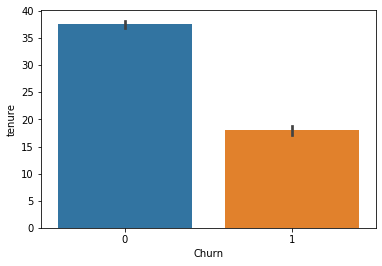

In [119]:
sns.barplot(x=df_new['Churn'],y=df_new['tenure'],data=df_new)

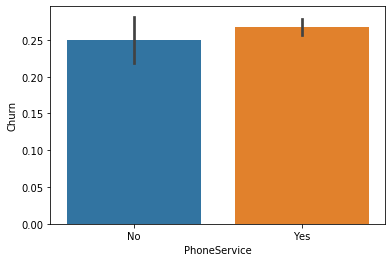

In [117]:
sns.barplot(x=df_new['PhoneService'],y=df_new['Churn'],data=df_new)

In [112]:
df_new['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

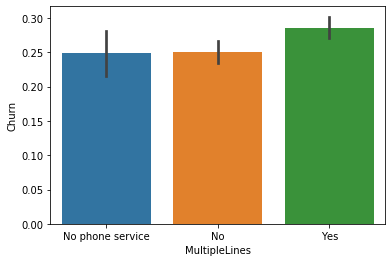

In [120]:
sns.barplot(x=df_new['MultipleLines'],y=df_new['Churn'],data=df_new)

In [114]:
df_new['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

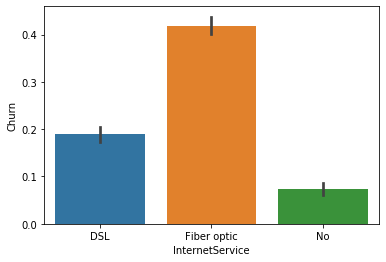

In [121]:
sns.barplot(x=df_new['InternetService'],y=df_new['Churn'],data=df_new)

In [116]:
df_new['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

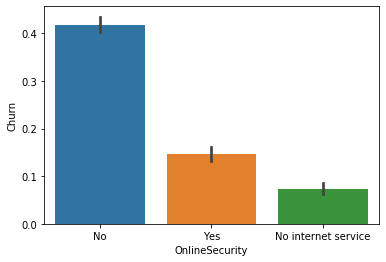

In [122]:
sns.barplot(x=df_new['OnlineSecurity'],y=df_new['Churn'],data=df_new)

In [123]:
df_new['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

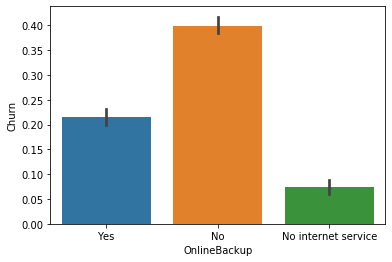

In [124]:
sns.barplot(x=df_new['OnlineBackup'],y=df_new['Churn'],data=df_new)

In [125]:
df_new['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

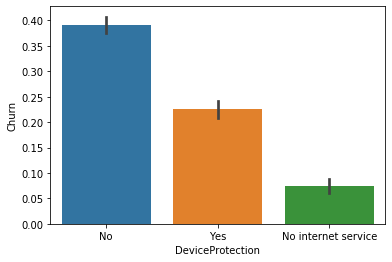

In [126]:
sns.barplot(x=df_new['DeviceProtection'],y=df_new['Churn'],data=df_new)

In [127]:
df_new['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

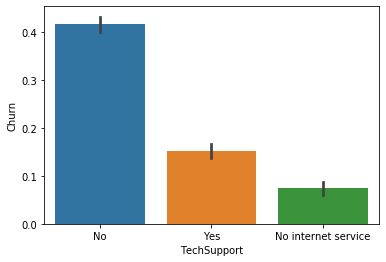

In [128]:
sns.barplot(x=df_new['TechSupport'],y=df_new['Churn'],data=df_new)

In [129]:
df_new['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

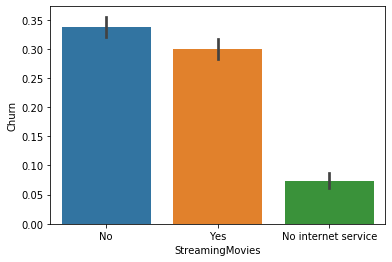

In [130]:
sns.barplot(x=df_new['StreamingMovies'],y=df_new['Churn'],data=df_new)

In [131]:
df_new['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

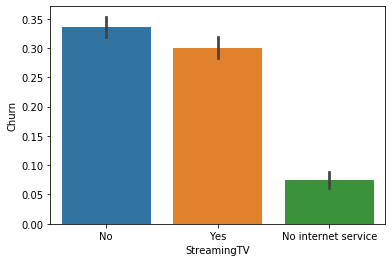

In [132]:
sns.barplot(x=df_new['StreamingTV'],y=df_new['Churn'],data=df_new)

In [133]:
df_new['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

# Overall Conclusion

1.The majority of customers that cancel their subscription have Phone Service enabled.

2.Customers that have Fiber-Optic Internet Service are more likely to cancel than those who have DSL

3.Customers that do not have Online Security, Device Protection, Online Backup, and Tech Support services enabled are more likely to leave

# Analysing in terms of Contracts

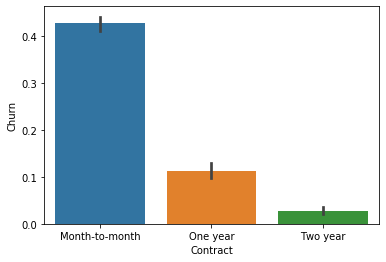

In [135]:
sns.barplot(x=df_new['Contract'],y=df_new['Churn'],data=df_new)

In [136]:
df_new['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

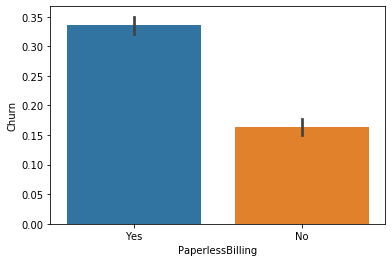

In [137]:
sns.barplot(x=df_new['PaperlessBilling'],y=df_new['Churn'],data=df_new)

In [138]:
df_new['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

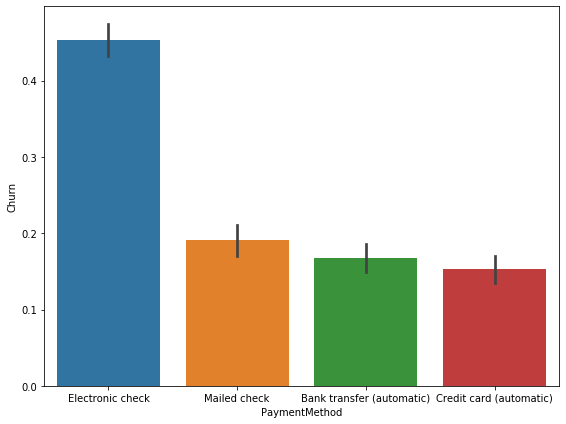

In [142]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_new['PaymentMethod'],y=df_new['Churn'],data=df_new)
plt.tight_layout()

In [143]:
df_new['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

# Overall Conclusion

1.The majority of customers that cancel their subscription have Month-to-month Contract type and Paperless Billing enabled

2.Customers that have Payment Method as Eletronic Check are more likely to leave

In [151]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Converting  categorical features into numerical using label encoder

In [232]:
from sklearn import preprocessing

In [233]:
label_encoder = preprocessing.LabelEncoder()

In [241]:
df_new.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [261]:
le = preprocessing.LabelEncoder()
df_new[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges','TotalCharges', 'Churn']].apply(le.fit_transform)

In [262]:
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Feature Selection

# Correlation Matrix

In [263]:
df_new.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825464,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452849,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175588,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253935,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375063,-0.195525


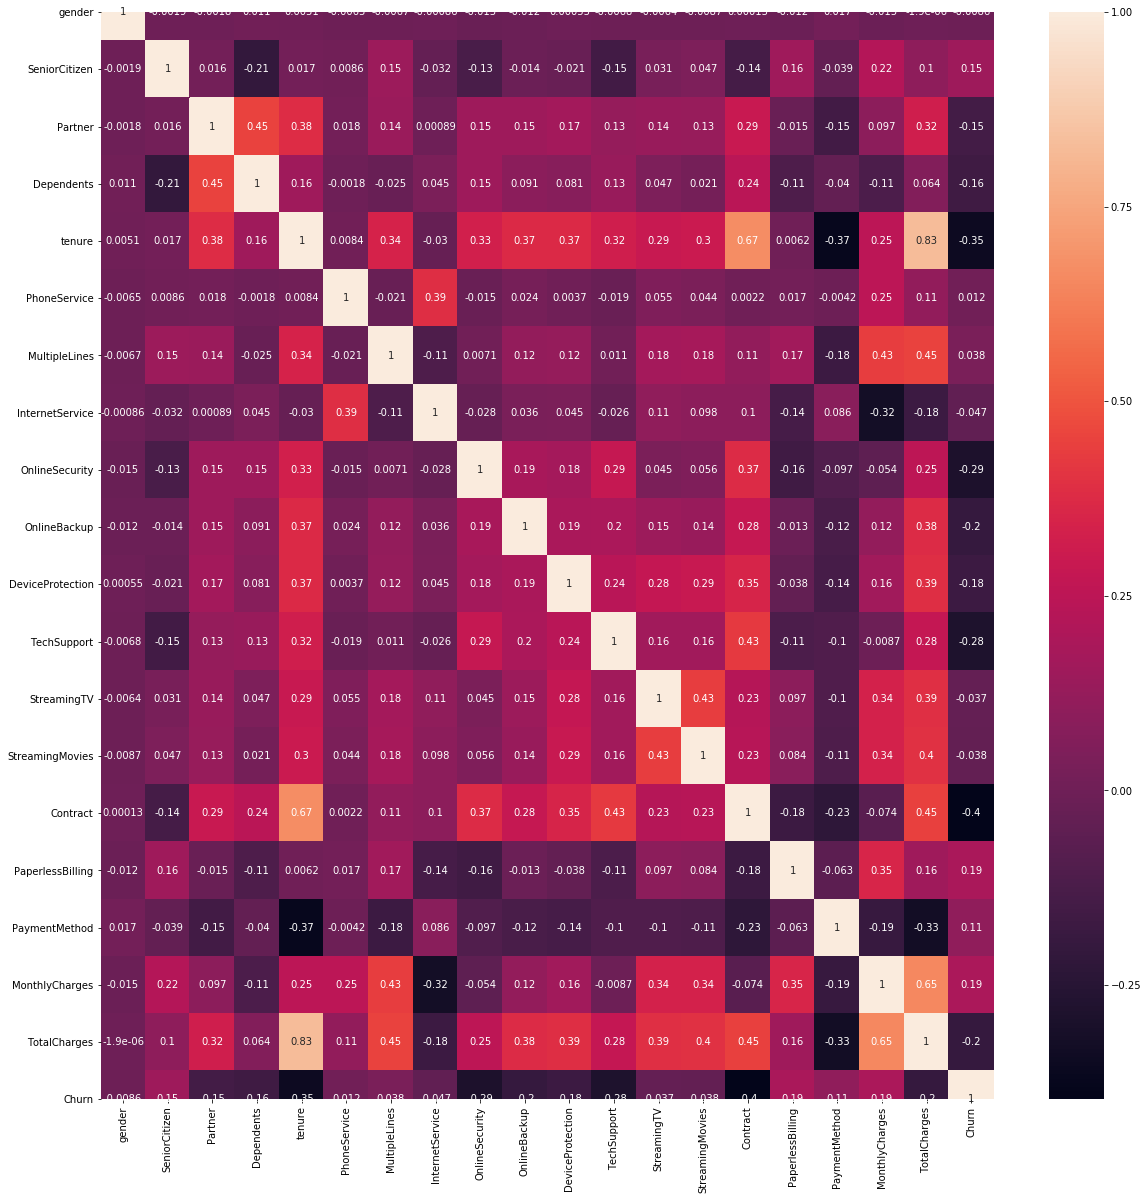

<Figure size 432x288 with 0 Axes>

In [546]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True)
plt.show()
plt.tight_layout()

Clearly, We can see from the graph there is a high correlation between tenure and contract,tenure and total charges,total charges and mothly charges, So we can drop some of the features like TotalCharges and Contract.

In [479]:
X=df_new.drop(['Churn','TotalCharges','Contract'],axis=1)

In [469]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,3,84.80
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,103.20
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,1,2,29.60
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,1,3,74.40


In [470]:
y=df_new['Churn']

In [471]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [472]:
print(model.feature_importances_)

[0.04225619 0.02740646 0.03347096 0.02740081 0.24728781 0.00706248
 0.02992662 0.03991149 0.05290786 0.03573269 0.03165285 0.05009314
 0.02571618 0.02584206 0.03367743 0.07799581 0.21165916]


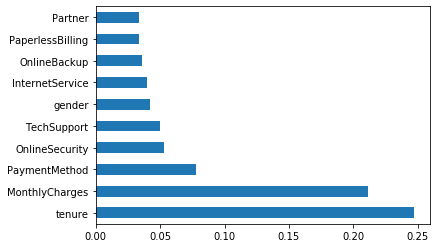

In [474]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

So, our new X will be: 

In [480]:
X=X[['tenure','MonthlyCharges','PaymentMethod','OnlineSecurity','TechSupport','gender','InternetService','OnlineBackup','PaperlessBilling','Partner']]

In [481]:
X.head()

,tenure,MonthlyCharges,PaymentMethod,OnlineSecurity,TechSupport,gender,InternetService,OnlineBackup,PaperlessBilling,Partner
0,1,29.85,2,0,0,0,0,2,1,1
1,34,56.95,3,2,0,1,0,0,0,0
2,2,53.85,3,2,0,1,0,2,1,0
3,45,42.30,0,2,2,1,0,0,0,0
4,2,70.70,2,0,0,0,1,0,1,0


# Model fitting using KFold cross validation and Hyperparameter tuning for Logistic Regression

In [482]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [483]:
log_class=LogisticRegression()
grid={'C':10.0**np.arange(-3,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,shuffle=False,random_state=None)

In [542]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.43,random_state=32)

In [543]:
lr=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
lr.fit(X_train,Y_train)

C:\Users\sauhard\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.69282881        nan 0.69903651        nan 0.70610422
        nan 0.70467774        nan 0.70515559        nan 0.70515559]
  category=UserWarning
C:\Users\sauhard\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [544]:
y_pred=lr.predict(X_test)

In [545]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(y_pred,Y_test))

[[1986  203]
 [ 415  425]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2401
           1       0.51      0.68      0.58       628

    accuracy                           0.80      3029
   macro avg       0.71      0.75      0.72      3029
weighted avg       0.82      0.80      0.81      3029

